<a href="https://colab.research.google.com/github/jdasam/aat3020/blob/main/notebooks/2_named_entity_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Named Entity Recognition
- For a given word and its context window, estimate whether the given word is location or not

# 1. Download dataset
- CoNLL2003

In [1]:
!wget https://data.deepai.org/conll2003.zip # Download dataset
!unzip conll2003.zip # Unzip dataset zip

--2024-04-04 06:00:58--  https://data.deepai.org/conll2003.zip
Resolving data.deepai.org (data.deepai.org)... 169.150.236.99, 2400:52e0:1a00::1029:1
Connecting to data.deepai.org (data.deepai.org)|169.150.236.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 982975 (960K) [application/zip]
Saving to: ‘conll2003.zip’

conll2003.zip       100%[===================>] 959.94K  --.-KB/s    in 0.1s    

2024-04-04 06:00:58 (7.32 MB/s) - ‘conll2003.zip’ saved [982975/982975]

Archive:  conll2003.zip
  inflating: metadata                
  inflating: test.txt                
  inflating: train.txt               
  inflating: valid.txt               


## 2. Preprocess Dataset

In [2]:
with open("train.txt") as f:
  string = ''.join(f.readlines())
dataset = string.split('\n')

dataset[:70]

['-DOCSTART- -X- -X- O',
 '',
 'EU NNP B-NP B-ORG',
 'rejects VBZ B-VP O',
 'German JJ B-NP B-MISC',
 'call NN I-NP O',
 'to TO B-VP O',
 'boycott VB I-VP O',
 'British JJ B-NP B-MISC',
 'lamb NN I-NP O',
 '. . O O',
 '',
 'Peter NNP B-NP B-PER',
 'Blackburn NNP I-NP I-PER',
 '',
 'BRUSSELS NNP B-NP B-LOC',
 '1996-08-22 CD I-NP O',
 '',
 'The DT B-NP O',
 'European NNP I-NP B-ORG',
 'Commission NNP I-NP I-ORG',
 'said VBD B-VP O',
 'on IN B-PP O',
 'Thursday NNP B-NP O',
 'it PRP B-NP O',
 'disagreed VBD B-VP O',
 'with IN B-PP O',
 'German JJ B-NP B-MISC',
 'advice NN I-NP O',
 'to TO B-PP O',
 'consumers NNS B-NP O',
 'to TO B-VP O',
 'shun VB I-VP O',
 'British JJ B-NP B-MISC',
 'lamb NN I-NP O',
 'until IN B-SBAR O',
 'scientists NNS B-NP O',
 'determine VBP B-VP O',
 'whether IN B-SBAR O',
 'mad JJ B-NP O',
 'cow NN I-NP O',
 'disease NN I-NP O',
 'can MD B-VP O',
 'be VB I-VP O',
 'transmitted VBN I-VP O',
 'to TO B-PP O',
 'sheep NN B-NP O',
 '. . O O',
 '',
 'Germany NNP B-NP B

In [3]:
from itertools import groupby

dataset_in_sentence = [list(group) for k, group in groupby(dataset, lambda x: x == "") if not k]
dataset_in_sentence[:5]

[['-DOCSTART- -X- -X- O'],
 ['EU NNP B-NP B-ORG',
  'rejects VBZ B-VP O',
  'German JJ B-NP B-MISC',
  'call NN I-NP O',
  'to TO B-VP O',
  'boycott VB I-VP O',
  'British JJ B-NP B-MISC',
  'lamb NN I-NP O',
  '. . O O'],
 ['Peter NNP B-NP B-PER', 'Blackburn NNP I-NP I-PER'],
 ['BRUSSELS NNP B-NP B-LOC', '1996-08-22 CD I-NP O'],
 ['The DT B-NP O',
  'European NNP I-NP B-ORG',
  'Commission NNP I-NP I-ORG',
  'said VBD B-VP O',
  'on IN B-PP O',
  'Thursday NNP B-NP O',
  'it PRP B-NP O',
  'disagreed VBD B-VP O',
  'with IN B-PP O',
  'German JJ B-NP B-MISC',
  'advice NN I-NP O',
  'to TO B-PP O',
  'consumers NNS B-NP O',
  'to TO B-VP O',
  'shun VB I-VP O',
  'British JJ B-NP B-MISC',
  'lamb NN I-NP O',
  'until IN B-SBAR O',
  'scientists NNS B-NP O',
  'determine VBP B-VP O',
  'whether IN B-SBAR O',
  'mad JJ B-NP O',
  'cow NN I-NP O',
  'disease NN I-NP O',
  'can MD B-VP O',
  'be VB I-VP O',
  'transmitted VBN I-VP O',
  'to TO B-PP O',
  'sheep NN B-NP O',
  '. . O O']]

In [4]:
# [len(sentence) for sentence in dataset_in_sentence]
filtered_dataset = [sentence for sentence in dataset_in_sentence if len(sentence) > 5]
len(filtered_dataset)

10625

In [5]:
filtered_dataset[1000]

['" " O O',
 'I PRP B-NP O',
 'think VBP B-VP O',
 'this DT B-NP O',
 'is VBZ B-VP O',
 'a DT B-NP O',
 'bad JJ I-NP O',
 'beginning NN I-NP O',
 '. . O O']

In [6]:
window_len = 2
sentence = filtered_dataset[0]

for i, word in enumerate(sentence):
  print(f'word is {word}')
  splitted_word = word.split(' ')
  print(f'splitted_word is {splitted_word}')
  center_word = splitted_word[0]
  label = splitted_word[-1]
  print(center_word, label)
  is_organization = label in ['B-ORG', 'I-ORG']
  print(f"is organization: {is_organization}")

  # concatenating with neighboring words

  # words in the left
  prev_index = max(i - window_len, 0) # clipping minimum to zero
  prev_words = sentence[prev_index:i]
  prev_words = [word_str.split(' ')[0] for word_str in prev_words] # collect the main word

  # print(prev_words)

  next_index = i + window_len + 1
  next_words = sentence[i+1:next_index]
  # next_words = [sentence[next_index] ]
  next_words = [word_str.split(' ')[0] for word_str in next_words]

  # We have to add padding, if number of prev words or next words are shorter than expected
  if len(prev_words) != window_len:
    prev_words = ['<pad>'] * (window_len - len(prev_words)) + prev_words

  if len(next_words) != window_len:
    next_words = next_words + ['<pad>'] * (window_len - len(next_words))

  concatenated_words = prev_words + [center_word] + next_words
  print(concatenated_words)

word is EU NNP B-NP B-ORG
splitted_word is ['EU', 'NNP', 'B-NP', 'B-ORG']
EU B-ORG
is organization: True
['<pad>', '<pad>', 'EU', 'rejects', 'German']
word is rejects VBZ B-VP O
splitted_word is ['rejects', 'VBZ', 'B-VP', 'O']
rejects O
is organization: False
['<pad>', 'EU', 'rejects', 'German', 'call']
word is German JJ B-NP B-MISC
splitted_word is ['German', 'JJ', 'B-NP', 'B-MISC']
German B-MISC
is organization: False
['EU', 'rejects', 'German', 'call', 'to']
word is call NN I-NP O
splitted_word is ['call', 'NN', 'I-NP', 'O']
call O
is organization: False
['rejects', 'German', 'call', 'to', 'boycott']
word is to TO B-VP O
splitted_word is ['to', 'TO', 'B-VP', 'O']
to O
is organization: False
['German', 'call', 'to', 'boycott', 'British']
word is boycott VB I-VP O
splitted_word is ['boycott', 'VB', 'I-VP', 'O']
boycott O
is organization: False
['call', 'to', 'boycott', 'British', 'lamb']
word is British JJ B-NP B-MISC
splitted_word is ['British', 'JJ', 'B-NP', 'B-MISC']
British B-MISC

In [7]:
def make_window_words_and_label_from_sentence(sentence):
  total_output = []
  for i, word in enumerate(sentence):
    splitted_word = word.split(' ')
    center_word = splitted_word[0]
    label = splitted_word[-1]
    is_organization = label in ['B-ORG', 'I-ORG']

    # concatenating with neighboring words

    # words in the left
    prev_index = max(i - window_len, 0) # clipping minimum to zero
    prev_words = sentence[prev_index:i]
    prev_words = [word_str.split(' ')[0] for word_str in prev_words] # collect the main word

    # print(prev_words)

    next_index = i + window_len + 1
    next_words = sentence[i+1:next_index]
    # next_words = [sentence[next_index] ]
    next_words = [word_str.split(' ')[0] for word_str in next_words]

    # We have to add padding, if number of prev words or next words are shorter than expected
    if len(prev_words) != window_len:
      prev_words = ['<pad>'] * (window_len - len(prev_words)) + prev_words

    if len(next_words) != window_len:
      next_words = next_words + ['<pad>'] * (window_len - len(next_words))

    concatenated_words = prev_words + [center_word] + next_words
    total_output.append( (concatenated_words, is_organization)  )
  return total_output

make_window_words_and_label_from_sentence(sentence)


[(['<pad>', '<pad>', 'EU', 'rejects', 'German'], True),
 (['<pad>', 'EU', 'rejects', 'German', 'call'], False),
 (['EU', 'rejects', 'German', 'call', 'to'], False),
 (['rejects', 'German', 'call', 'to', 'boycott'], False),
 (['German', 'call', 'to', 'boycott', 'British'], False),
 (['call', 'to', 'boycott', 'British', 'lamb'], False),
 (['to', 'boycott', 'British', 'lamb', '.'], False),
 (['boycott', 'British', 'lamb', '.', '<pad>'], False),
 (['British', 'lamb', '.', '<pad>', '<pad>'], False)]

In [8]:
entire_dataset = [make_window_words_and_label_from_sentence(sentence) for sentence in filtered_dataset ]
entire_dataset = [windowed_word for sentence in entire_dataset for windowed_word in sentence]

In [9]:
len(entire_dataset)

192587

In [10]:
entire_dataset[10000]

(['eight', 'in', 'a', 'row', ','], False)

In [11]:
import gensim.downloader

wrd2vec = gensim.downloader.load("glove-wiki-gigaword-300")

[==================================================] 100.0% 376.1/376.1MB downloaded


In [12]:
len(wrd2vec)

400000

In [13]:
import numpy as np
data_example = entire_dataset[0]
word_list, label = data_example

# convert list of word in string into a concatenated vector
word_list

def get_flattened_vector(word_list:list, wrd2vec):
  flattened_vec = []
  for word in word_list:
    word = word.lower()
    if word in wrd2vec:
      vec = wrd2vec[word]
    else:
      vec = np.zeros(300)
    # print(vec.shape)
    flattened_vec.append(vec)
  flattened_vec = np.concatenate(flattened_vec)
  return flattened_vec

get_flattened_vector(word_list, wrd2vec).shape

(1500,)

In [14]:
import torch
import torch.nn as nn

class Classifier(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__() # initialize nn.Module first
    self.layer1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.layer2 = nn.Linear(hidden_size, output_size, bias=False)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    h = self.relu(self.layer1(x))
    s = self.layer2(h)
    out = self.sigmoid(s)
    return out.squeeze()

input_vec = get_flattened_vector(word_list, wrd2vec)
model = Classifier(input_size=1500, hidden_size=47, output_size=1)
model(torch.Tensor(input_vec))

tensor(0.5270, grad_fn=<SqueezeBackward0>)

# Build a Dataset Class

In [74]:
class Dataset:
  def __init__(self, txt_fn="train.txt", wrd2vec=None):
    text_lines = self.load_txt_and_split(txt_fn)
    dataset_in_sentence = self.group_by_sentence(text_lines)
    filtered_dataset = [sentence for sentence in dataset_in_sentence if len(sentence) > 5]
    entire_dataset = [self.make_window_words_and_label_from_sentence(sentence) for sentence in filtered_dataset ]
    self.entire_data = self.flatten_list_of_list(entire_dataset)
    # self.wrd2vec = gensim.downloader.load("glove-wiki-gigaword-300")
    self.wrd2vec = wrd2vec

  @staticmethod
  def flatten_list_of_list(list_of_list):
    return [y for x in list_of_list for y in x]

  @staticmethod
  def make_window_words_and_label_from_sentence(sentence):
    total_output = []
    for i, word in enumerate(sentence):
      splitted_word = word.split(' ')
      center_word = splitted_word[0]
      label = splitted_word[-1]
      is_organization = label in ['B-ORG', 'I-ORG']

      # concatenating with neighboring words

      # words in the left
      prev_index = max(i - window_len, 0) # clipping minimum to zero
      prev_words = sentence[prev_index:i]
      prev_words = [word_str.split(' ')[0] for word_str in prev_words] # collect the main word

      # print(prev_words)

      next_index = i + window_len + 1
      next_words = sentence[i+1:next_index]
      # next_words = [sentence[next_index] ]
      next_words = [word_str.split(' ')[0] for word_str in next_words]

      # We have to add padding, if number of prev words or next words are shorter than expected
      if len(prev_words) != window_len:
        prev_words = ['<pad>'] * (window_len - len(prev_words)) + prev_words

      if len(next_words) != window_len:
        next_words = next_words + ['<pad>'] * (window_len - len(next_words))

      concatenated_words = prev_words + [center_word] + next_words
      total_output.append( (concatenated_words, is_organization)  )
    return total_output


  @staticmethod
  def group_by_sentence(text_lines:list):
    return [list(group) for k, group in groupby(text_lines, lambda x: x == "") if not k]



  @staticmethod
  def load_txt_and_split(txt_fn):
    with open(txt_fn) as f:
      string = ''.join(f.readlines())
    dataset = string.split('\n')
    return dataset

  def _load_txt_and_split(self, txt_fn="train.txt"):
    with open(txt_fn) as f:
      string = ''.join(f.readlines())
    dataset = string.split('\n')
    return dataset

  def __getitem__(self, idx):
    data_sample = self.entire_data[idx]
    windowed_words, label = data_sample
    flattened_vector = self.get_flattened_vector(windowed_words, self.wrd2vec)
    return flattened_vector, label

  def __len__(self):
    return len(self.entire_data)

  @staticmethod
  def get_flattened_vector(word_list:list, wrd2vec):
    flattened_vec = []
    for word in word_list:
      word = word.lower()
      if word in wrd2vec:
        vec = wrd2vec[word]
      else:
        vec = np.zeros(300)
      # print(vec.shape)
      flattened_vec.append(vec)
    flattened_vec = np.concatenate(flattened_vec)
    return flattened_vec


dataset = Dataset(wrd2vec=wrd2vec)
# dataset._load_txt_and_split() # this is how you call class method
# Dataset.load_txt_and_split('train.txt') # you can call the staticmethod without making an instance
dataset[0]


(array([ 0.        ,  0.        ,  0.        , ..., -0.19499999,
         0.20411   ,  0.35297999]),
 True)

In [31]:
from typing import List, Tuple
from torch.utils.data import DataLoader

def custom_collate_fn(raw_batch:List[Tuple[np.ndarray, bool]]):
  vectors = []
  labels = []
  for item in raw_batch:
    vector, label = item
    vectors.append(vector)
    labels.append(label)
  vectors = np.stack(vectors)
  return torch.Tensor(vectors), torch.Tensor(labels)

train_loader = DataLoader(dataset, batch_size=3, collate_fn=custom_collate_fn)

# for batch in train_loader: # in python, for x in y makes iter(y): iterator of y
#   batch
#   break
# vectors, labels = batch
# vectors.shape, labels.shape

raw_batch = [dataset[i] for i in range(3)] # this is how dataloader calls its dataset
custom_collate_fn(raw_batch) # and it feed this raw_batch to collate_fn


(tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.1950,  0.2041,  0.3530],
         [ 0.0000,  0.0000,  0.0000,  ..., -0.2705, -0.1292, -0.0133],
         [ 0.5473, -0.2364, -0.2143,  ..., -0.1604,  0.0467, -0.0706]]),
 tensor([1., 0., 0.]))

In [69]:
def get_bce(pred, target, eps=1e-4):
  assert pred.shape == target.shape
  assert torch.min(pred) >= 0, "prediction must be output of sigmoid function"
  assert torch.max(pred) <= 1, "prediction must be output of sigmoid function"

  # BCE loss = - ( y*log(y_hat) + (1-y)*log(1-y_hat))

  return -(target * torch.log(pred+eps) + (1-target) * torch.log(1-pred+eps)).mean()


In [70]:
from tqdm.auto import tqdm

model = Classifier(input_size=1500, hidden_size=64, output_size=1)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
train_loader = DataLoader(dataset, batch_size=128, collate_fn=custom_collate_fn, shuffle=True)
dev = 'cuda'

model.to(dev)
loss_record = []
num_epochs = 5

for epoch in range(num_epochs):
  for batch in tqdm(train_loader): # in python, for x in y makes iter(y): iterator of y
    vectors, labels = batch
    vectors, labels = vectors.to(dev), labels.to(dev)
    pred = model(vectors)
    # calculate the loss
    loss = get_bce(pred, labels)
    # backpropagate
    loss.backward()
    # update the parameters
    optimizer.step()
    # reset the gradient
    optimizer.zero_grad()

    loss_record.append(loss.item())

  0%|          | 0/1505 [00:00<?, ?it/s]

  0%|          | 0/1505 [00:00<?, ?it/s]

  0%|          | 0/1505 [00:00<?, ?it/s]

  0%|          | 0/1505 [00:00<?, ?it/s]

  0%|          | 0/1505 [00:00<?, ?it/s]

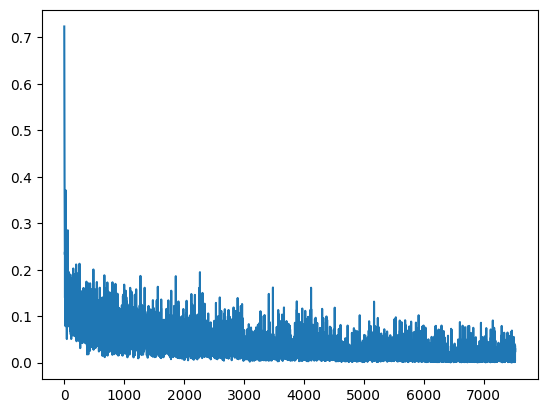

In [71]:
import matplotlib.pyplot as plt
plt.plot(loss_record)

In [83]:
testset = Dataset('test.txt', wrd2vec=wrd2vec)
test_loader= DataLoader(testset, batch_size=200, collate_fn=custom_collate_fn)

model.eval()
for batch in test_loader:
  vectors, labels = batch
  vectors, labels = vectors.to(dev), labels.to(dev)
  pred = model(vectors)
  thresholded_pred = pred > 0.1
  # thresholded_pred = torch.zeros_like(labels)
  num_correct_pred = torch.sum(thresholded_pred == labels)
  # acc = num_correct_pred / len(labels)
  # print(acc.item())
  num_true_positive = torch.sum(thresholded_pred * labels) # a AND b
  num_true_gt = torch.sum(labels==1)
  print(num_true_positive.item(), num_true_gt.item())
# num_correct_pred

0.0 0
1.0 1
2.0 2
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
8.0 13
11.0 13
28.0 33
2.0 3
3.0 4
0.0 0
6.0 10
2.0 2
0.0 0
0.0 0
1.0 1
0.0 0
0.0 0
0.0 0
2.0 5
27.0 27
19.0 27
14.0 17
22.0 26
35.0 36
13.0 22
37.0 37
40.0 41
23.0 23
23.0 23
16.0 16
19.0 24
26.0 26
14.0 18
6.0 7
15.0 16
15.0 15
17.0 17
15.0 15
4.0 4
5.0 5
1.0 1
17.0 19
8.0 9
2.0 2
4.0 4
3.0 3
3.0 8
15.0 18
6.0 6
4.0 5
5.0 5
10.0 13
13.0 18
9.0 10
11.0 18
2.0 2
2.0 3
0.0 0
15.0 21
3.0 5
10.0 10
18.0 19
12.0 14
14.0 19
19.0 23
16.0 20
13.0 14
0.0 0
0.0 0
3.0 3
3.0 3
9.0 9
2.0 2
3.0 3
0.0 0
1.0 1
5.0 5
0.0 0
4.0 12
6.0 10
4.0 10
11.0 13
7.0 7
5.0 5
3.0 7
1.0 1
0.0 0
7.0 8
0.0 0
4.0 5
0.0 2
7.0 7
0.0 0
4.0 5
0.0 0
8.0 8
5.0 10
7.0 9
3.0 5
10.0 14
17.0 20
17.0 18
8.0 10
4.0 4
10.0 10
8.0 8
13.0 13
7.0 8
3.0 3
5.0 8
4.0 6
17.0 18
10.0 10
5.0 5
0.0 1
7.0 7
5.0 5
1.0 5
4.0 5
15.0 18
3.0 7
6.0 6
8.0 8
14.0 15
6.0 9
8.0 12
11.0 11
6.0 6
1.0 2
10.0 15
2.0 2
7.0 9
0.0 0
3.0 3
6.0 6
4.0 4
6.0 6
6.0 6
7.0 7
3.0 3
4.0 4
4.0 5
5.0 9
0.0 0
0.0 0
5.0 5
5

In [73]:
# Inference code
# test_str = "students in sogang university are"
test_str = "studenst are studying in library"
test_words = test_str.split(' ')
converted_vector = Dataset.get_flattened_vector(test_words, dataset.wrd2vec)
converted_vector = torch.Tensor(converted_vector)
model(converted_vector.to(dev))

tensor(0.0018, device='cuda:0', grad_fn=<SqueezeBackward0>)

In [48]:
labels

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])